# Titanic Dataset Analysis
*Titanic Dataset Analysis and Machine Learning*<br>
*Complete Data Science Pipeline*

[Titanic dataset (CSV)](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

1. **Data Loading and Initial Exploration**: Loads the Titanic dataset from the URL and displays basic information.
2. **Data Cleaning and Preprocessing**: Handles missing values and prepares the data for analysis.
3. **Exploratory Data Analysis**: Examines survival rates across different variables.
4. **Statistical Analysis**: Performs chi-square tests and t-tests to identify significant relationships.
5. **Data Visualization**: Creates multiple visualizations to understand patterns in the data.
6. **Feature Engineering**: Creates new features like family size, age bins, and interaction terms.
7. **Machine Learning Classification**: Implements and compares multiple classification algorithms.
8. **Model Evaluation and Comparison**: Evaluates each model using accuracy, cross-validation, ROC curves, and performs hyperparameter tuning.

## 1. Data Loading and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the style for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Load the Titanic dataset from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [4]:
# Display basic information about the dataset
print("Dataset Shape:", titanic_df.shape)
print("\nDataset Information:")
titanic_df.info()

Dataset Shape: (891, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("\nFirst 5 rows of the dataset:")
print(titanic_df.head())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [6]:
print("\nSummary statistics:")
print(titanic_df.describe())


Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print("\nNumber of missing values in each column:")
print(titanic_df.isnull().sum())


Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 2. Data Cleaning and Preprocessing

In [8]:
# Create a copy of the original dataset to preserve it
df = titanic_df.copy()

In [9]:
# Handling missing values
# For Age, we'll impute with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the Cabin column as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

# For Embarked, we'll fill with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check if there are any missing values left
print("\nRemaining missing values after cleaning:")
print(df.isnull().sum())

# Feature engineering for titles
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Jonkheer', 'Sir', 'Don', 'Lady', 'Countess', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print("\nTitle distribution after grouping:")
print(df['Title'].value_counts())

# Convert categorical features to numerical
# Encode Sex feature
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode Embarked feature
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# Encode Title feature
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
df['Title'] = df['Title'].map(title_mapping)

# Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger themselves

# Create a feature to identify if someone is traveling alone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Create Fare bins
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])

# Create Age bins
df['AgeBin'] = pd.cut(df['Age'], 5, labels=[0, 1, 2, 3, 4])

# Drop unnecessary columns
cols_to_drop = ['Name', 'Ticket', 'PassengerId']
df = df.drop(cols_to_drop, axis=1)


Remaining missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Title distribution after grouping:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [10]:
print("\nFinal dataset shape after preprocessing:", df.shape)
print("\nFinal dataset head:")
print(df.head())


Final dataset shape after preprocessing: (891, 13)

Final dataset head:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  \
0         0       3    0  22.0      1      0   7.2500         0      0   
1         1       1    1  38.0      1      0  71.2833         1      2   
2         1       3    1  26.0      0      0   7.9250         0      1   
3         1       1    1  35.0      1      0  53.1000         0      2   
4         0       3    0  35.0      0      0   8.0500         0      0   

   FamilySize  IsAlone FareBin AgeBin  
0           2        0       0      1  
1           2        0       3      2  
2           1        1       1      1  
3           2        0       3      2  
4           1        1       1      2  


## 3. Exploratory Data Analysis

In [11]:
# Survival rate
print("\nOverall survival rate:")
print(df['Survived'].value_counts(normalize=True))


Overall survival rate:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [12]:
# Survival rate by Sex
print("\nSurvival rate by Sex:")
print(pd.crosstab(df['Sex'], df['Survived'], normalize='index'))


Survival rate by Sex:
Survived         0         1
Sex                         
0         0.811092  0.188908
1         0.257962  0.742038


In [13]:
# Survival rate by Pclass
print("\nSurvival rate by Pclass:")
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'))


Survival rate by Pclass:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [14]:
# Survival rate by Title
print("\nSurvival rate by Title:")
print(pd.crosstab(df['Title'], df['Survived'], normalize='index'))


Survival rate by Title:
Survived         0         1
Title                       
0         0.843327  0.156673
1         0.297297  0.702703
2         0.206349  0.793651
3         0.425000  0.575000
4         0.652174  0.347826


In [15]:
# Survival rate by Age bin
print("\nSurvival rate by Age bin:")
print(pd.crosstab(df['AgeBin'], df['Survived'], normalize='index'))


Survival rate by Age bin:
Survived         0         1
AgeBin                      
0         0.450000  0.550000
1         0.655832  0.344168
2         0.595745  0.404255
3         0.565217  0.434783
4         0.909091  0.090909


In [16]:
# Survival rate by Family Size
print("\nSurvival rate by Family Size:")
print(pd.crosstab(df['FamilySize'], df['Survived'], normalize='index'))


Survival rate by Family Size:
Survived           0         1
FamilySize                    
1           0.696462  0.303538
2           0.447205  0.552795
3           0.421569  0.578431
4           0.275862  0.724138
5           0.800000  0.200000
6           0.863636  0.136364
7           0.666667  0.333333
8           1.000000  0.000000
11          1.000000  0.000000


In [17]:
# Survival rate by IsAlone
print("\nSurvival rate by IsAlone:")
print(pd.crosstab(df['IsAlone'], df['Survived'], normalize='index'))


Survival rate by IsAlone:
Survived         0         1
IsAlone                     
0         0.494350  0.505650
1         0.696462  0.303538


## 4. Statistical Analysis

In [18]:
# Correlation Matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix['Survived'].sort_values(ascending=False))


Correlation Matrix:
Survived      1.000000
Sex           0.543351
Title         0.407753
FareBin       0.299357
Fare          0.257307
Embarked      0.106811
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
AgeBin       -0.043800
Age          -0.064910
IsAlone      -0.203367
Pclass       -0.338481
Name: Survived, dtype: float64


In [19]:
# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

def chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

categorical_vars = ['Sex', 'Pclass', 'Title', 'Embarked', 'IsAlone']
print("\nChi-square test for categorical variables with Survived:")
for var in categorical_vars:
    chi2, p = chi_square_test(df, var, 'Survived')
    print(f"{var}: Chi2 = {chi2:.4f}, p-value = {p:.8f}")


Chi-square test for categorical variables with Survived:
Sex: Chi2 = 260.7170, p-value = 0.00000000
Pclass: Chi2 = 102.8890, p-value = 0.00000000
Title: Chi2 = 288.1183, p-value = 0.00000000
Embarked: Chi2 = 25.9645, p-value = 0.00000230
IsAlone: Chi2 = 36.0005, p-value = 0.00000000


In [20]:
# T-test for continuous variables
from scipy.stats import ttest_ind

def t_test(df, var, target):
    survived = df[df[target] == 1][var]
    not_survived = df[df[target] == 0][var]
    t_stat, p_val = ttest_ind(survived, not_survived, equal_var=False)
    return t_stat, p_val

continuous_vars = ['Age', 'Fare', 'FamilySize']
print("\nT-test for continuous variables with Survived:")
for var in continuous_vars:
    t_stat, p_val = t_test(df, var, 'Survived')
    print(f"{var}: t-statistic = {t_stat:.4f}, p-value = {p_val:.8f}")


T-test for continuous variables with Survived:
Age: t-statistic = -1.8966, p-value = 0.05830916
Fare: t-statistic = 6.8391, p-value = 0.00000000
FamilySize: t-statistic = 0.5458, p-value = 0.58533511


## 5. Data Visualization

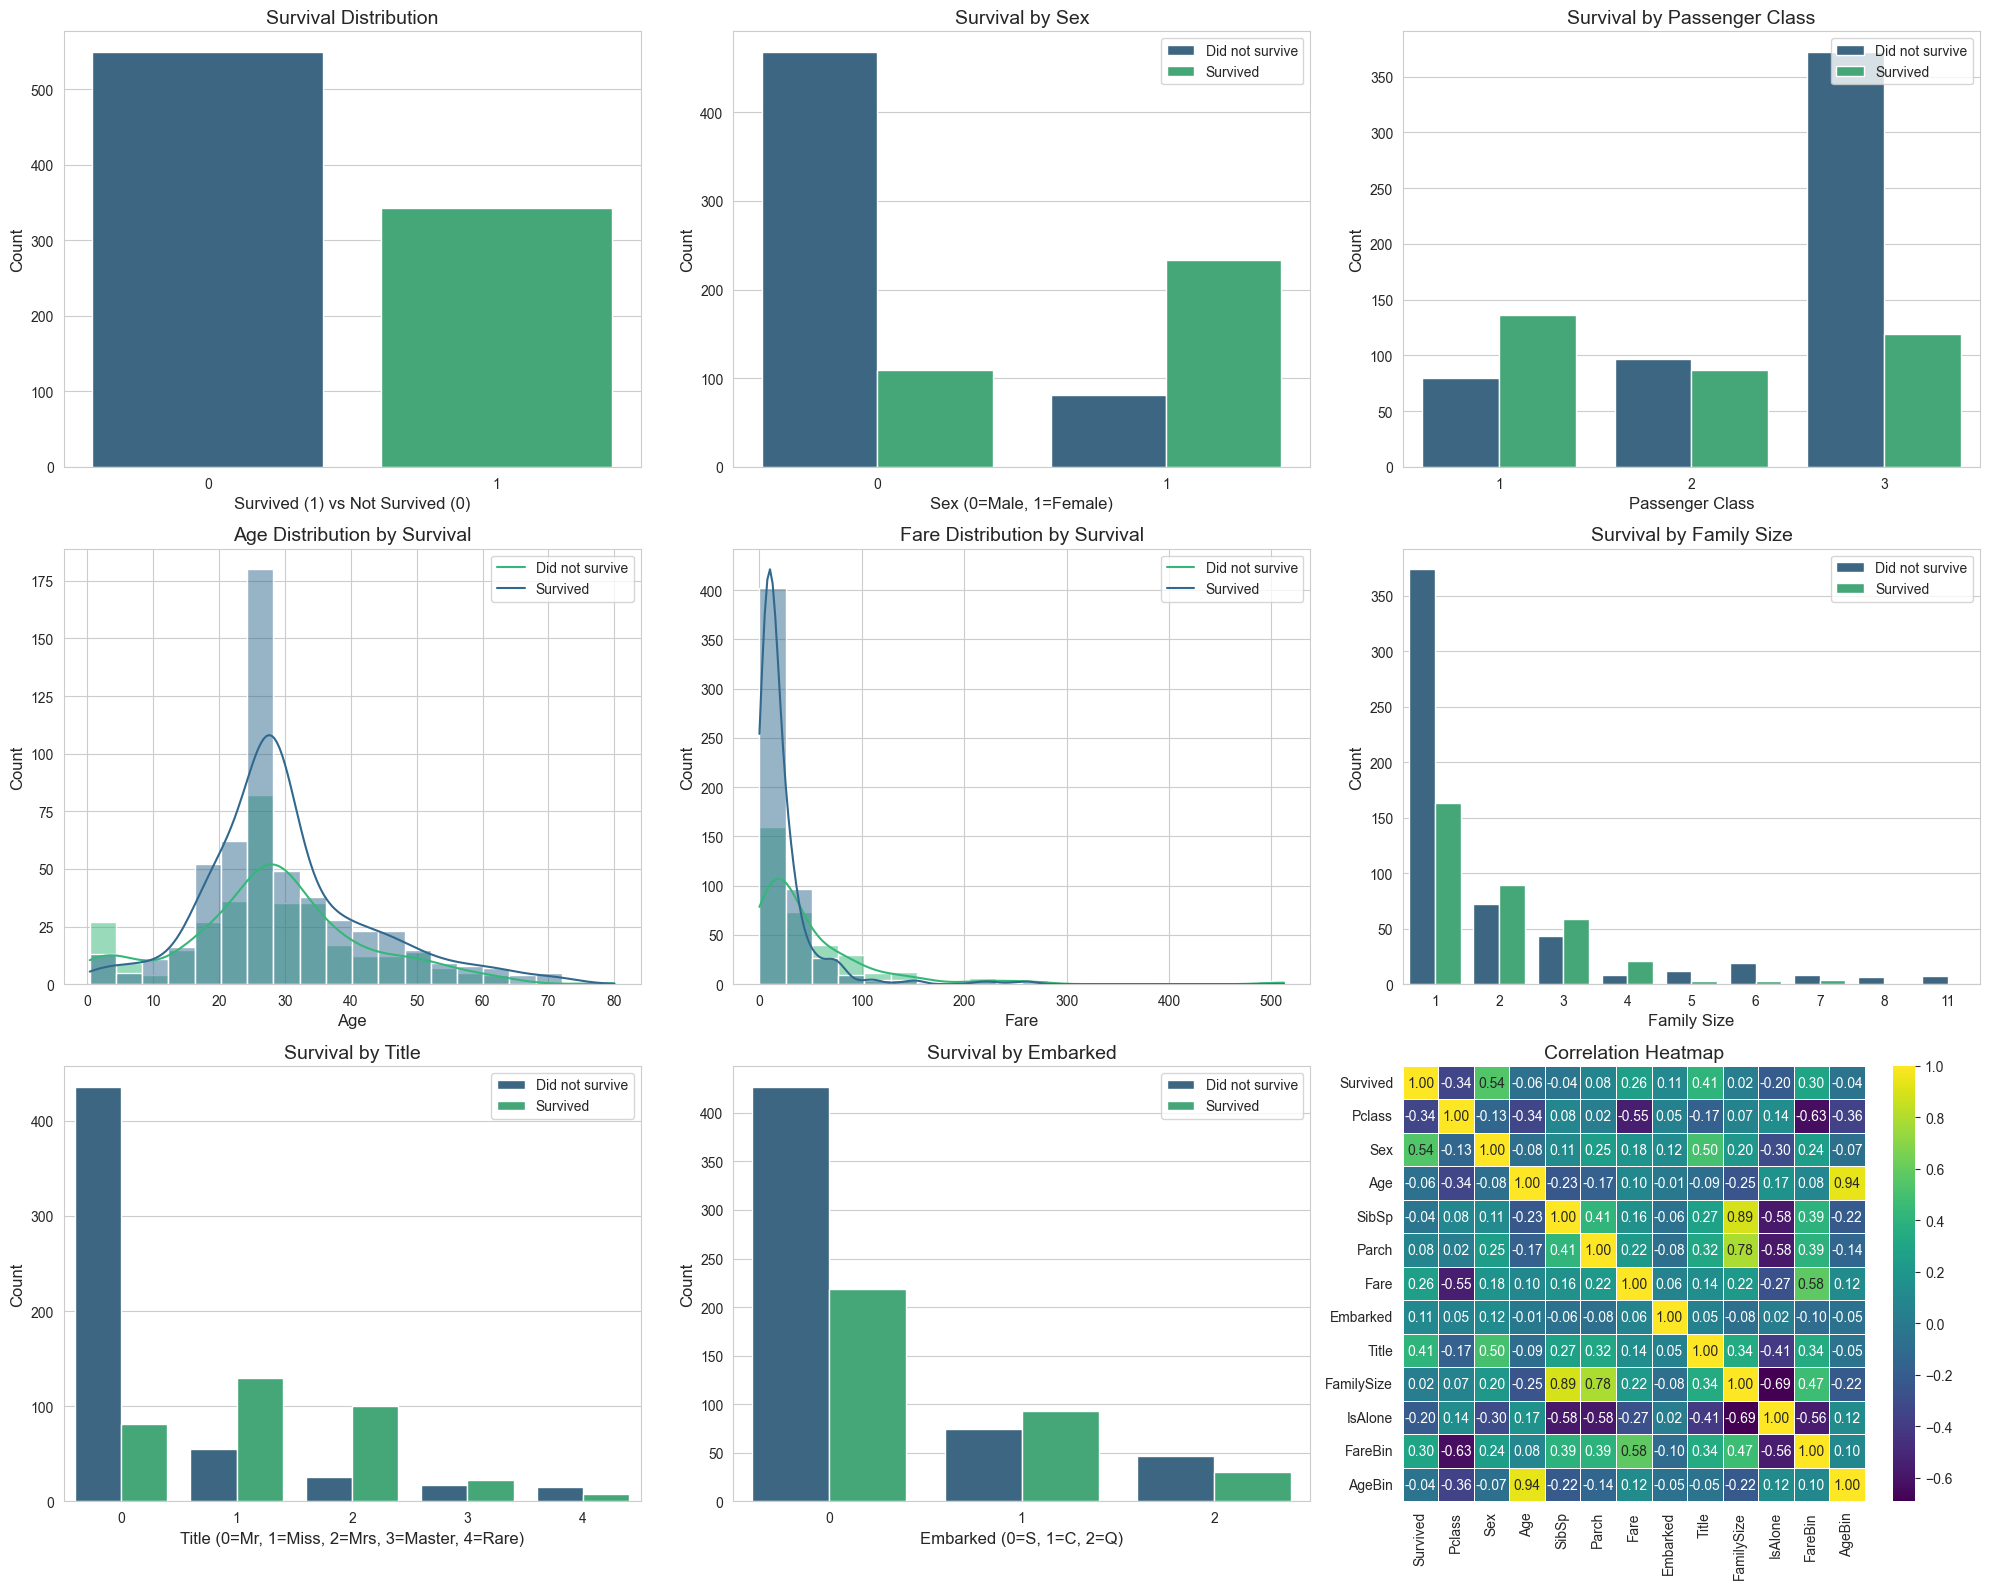

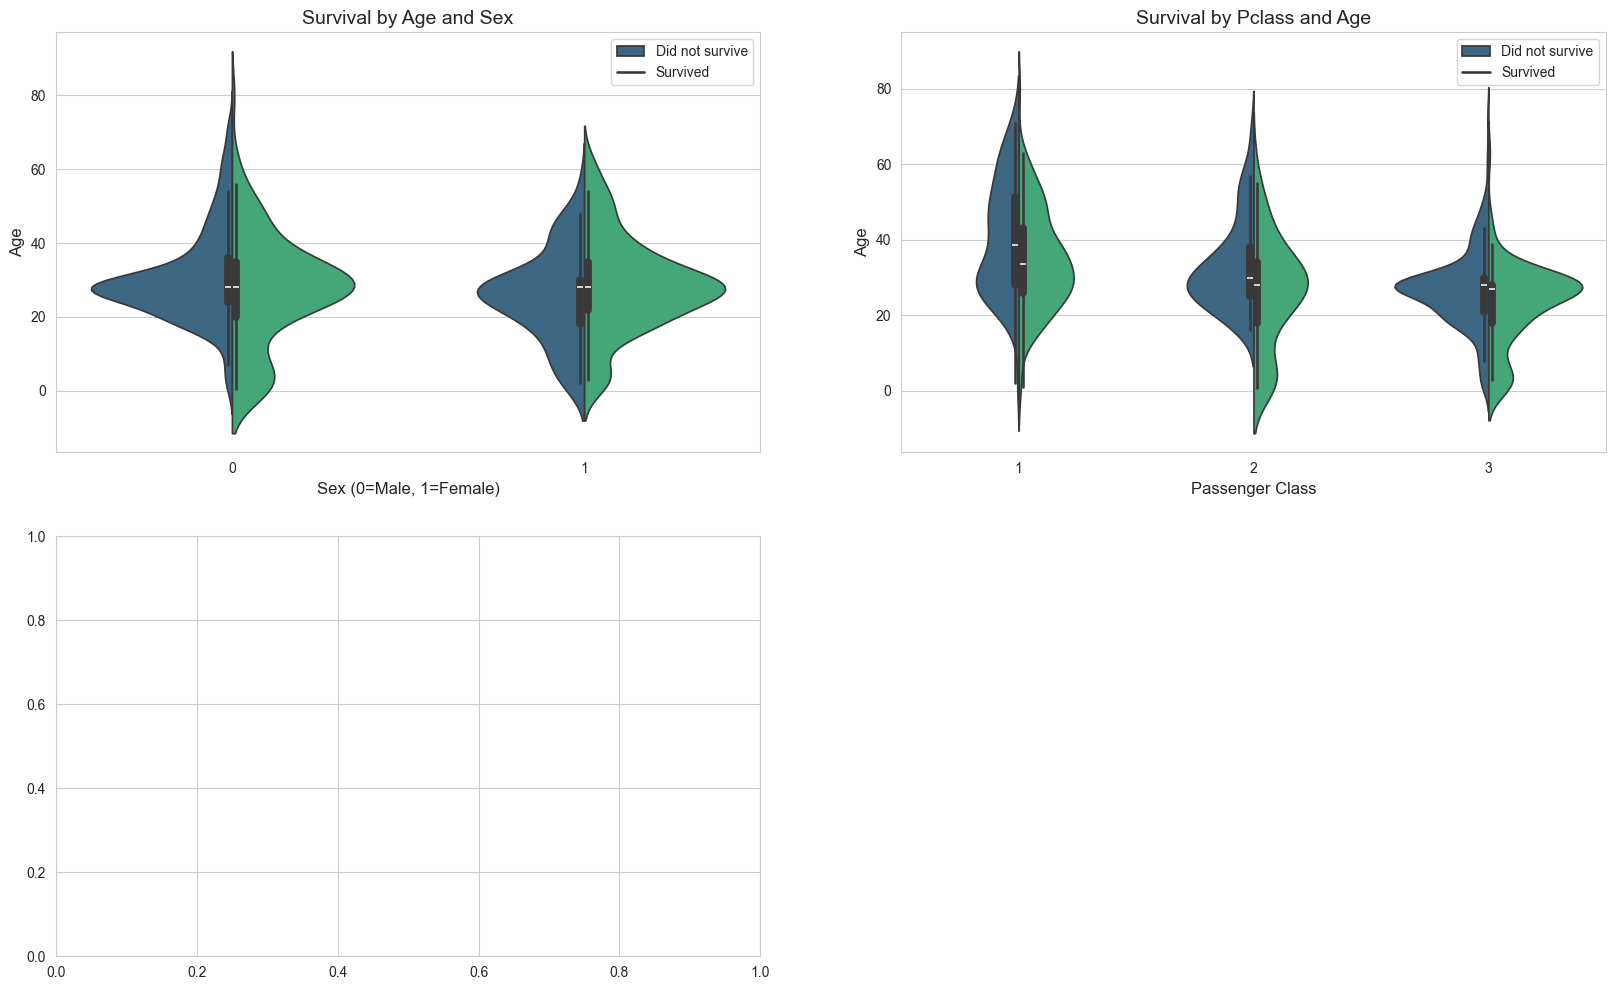

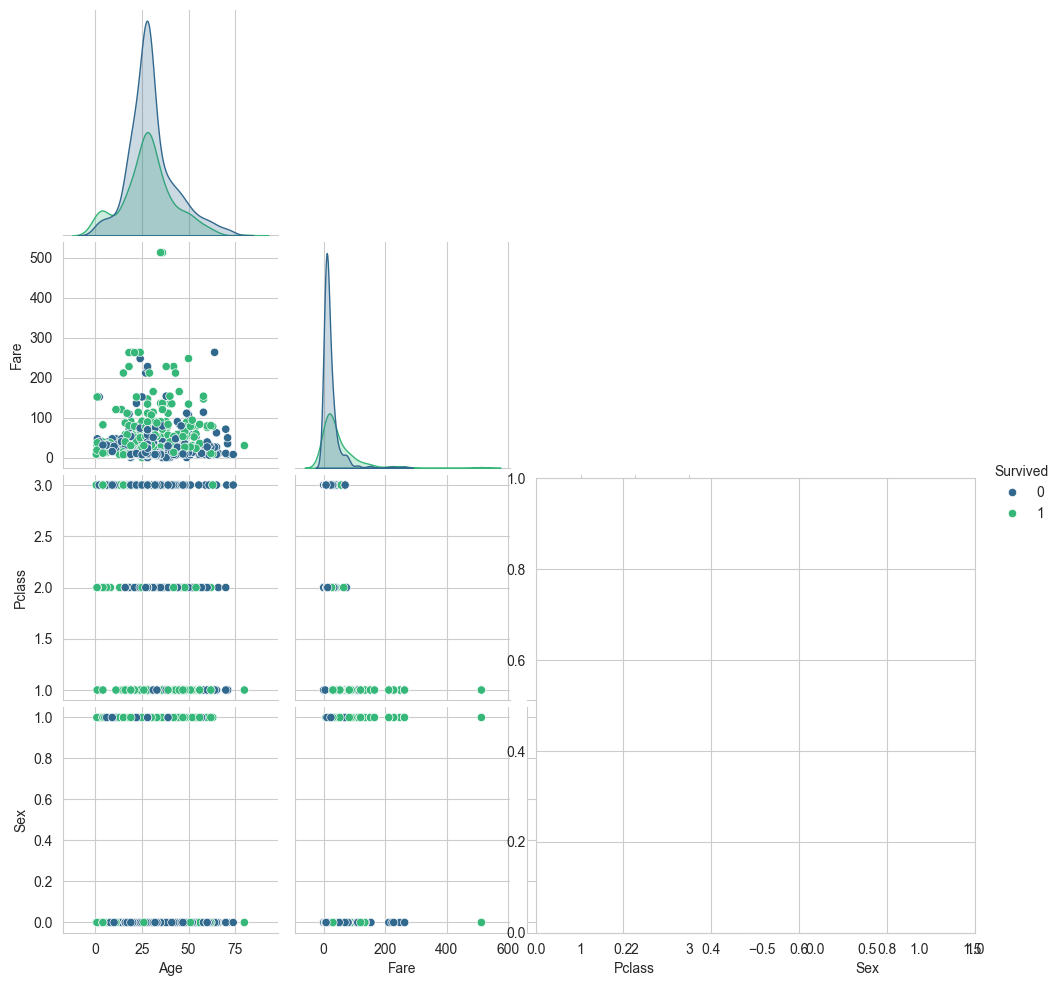

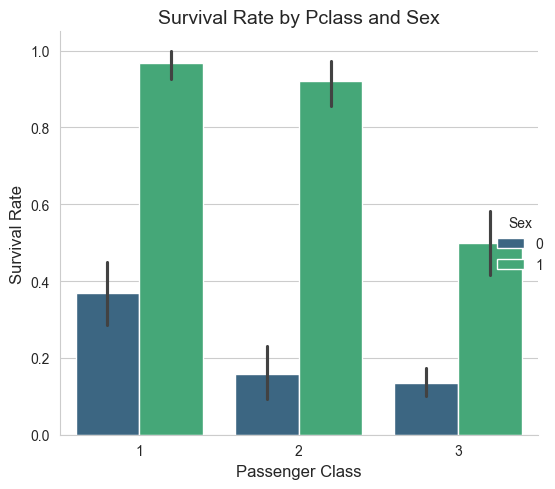

In [21]:
# Set up a figure for multiple plots
plt.figure(figsize=(20, 16))

# 1. Survival Countplot
plt.subplot(3, 3, 1)
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Survived (1) vs Not Survived (0)', fontsize=12)

# 2. Survival by Sex
plt.subplot(3, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Sex', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sex (0=Male, 1=Female)', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 3. Survival by Pclass
plt.subplot(3, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 4. Age Distribution
plt.subplot(3, 3, 4)
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True, palette='viridis')
plt.title('Age Distribution by Survival', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 5. Fare Distribution
plt.subplot(3, 3, 5)
sns.histplot(data=df, x='Fare', hue='Survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Fare', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 6. Family Size Distribution
plt.subplot(3, 3, 6)
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Family Size', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Family Size', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 7. Title Distribution
plt.subplot(3, 3, 7)
sns.countplot(x='Title', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Title', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Title (0=Mr, 1=Miss, 2=Mrs, 3=Master, 4=Rare)', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 8. Embarked Distribution
plt.subplot(3, 3, 8)
sns.countplot(x='Embarked', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Embarked', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Embarked (0=S, 1=C, 2=Q)', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 9. Correlation Heatmap
plt.subplot(3, 3, 9)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)

plt.tight_layout()
plt.show()

# Additional Visualizations for deeper insights
plt.figure(figsize=(20, 12))

# 1. Survival by Age and Sex
plt.subplot(2, 2, 1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette='viridis')
plt.title('Survival by Age and Sex', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Sex (0=Male, 1=Female)', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 2. Survival by Pclass and Age
plt.subplot(2, 2, 2)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='viridis')
plt.title('Survival by Pclass and Age', fontsize=14)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)
plt.legend(['Did not survive', 'Survived'], loc='upper right')

# 3. Pair Plot for Key Features
features = ['Age', 'Fare', 'Pclass', 'Sex', 'Survived']
plt.subplot(2, 2, 3)
sns.pairplot(df[features], hue='Survived', palette='viridis', corner=True)
plt.title('Pair Plot of Key Features', fontsize=14)

# 4. Survival by Pclass and Sex
plt.subplot(2, 2, 4)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', palette='viridis')
plt.title('Survival Rate by Pclass and Sex', fontsize=14)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)

plt.tight_layout()
plt.show()

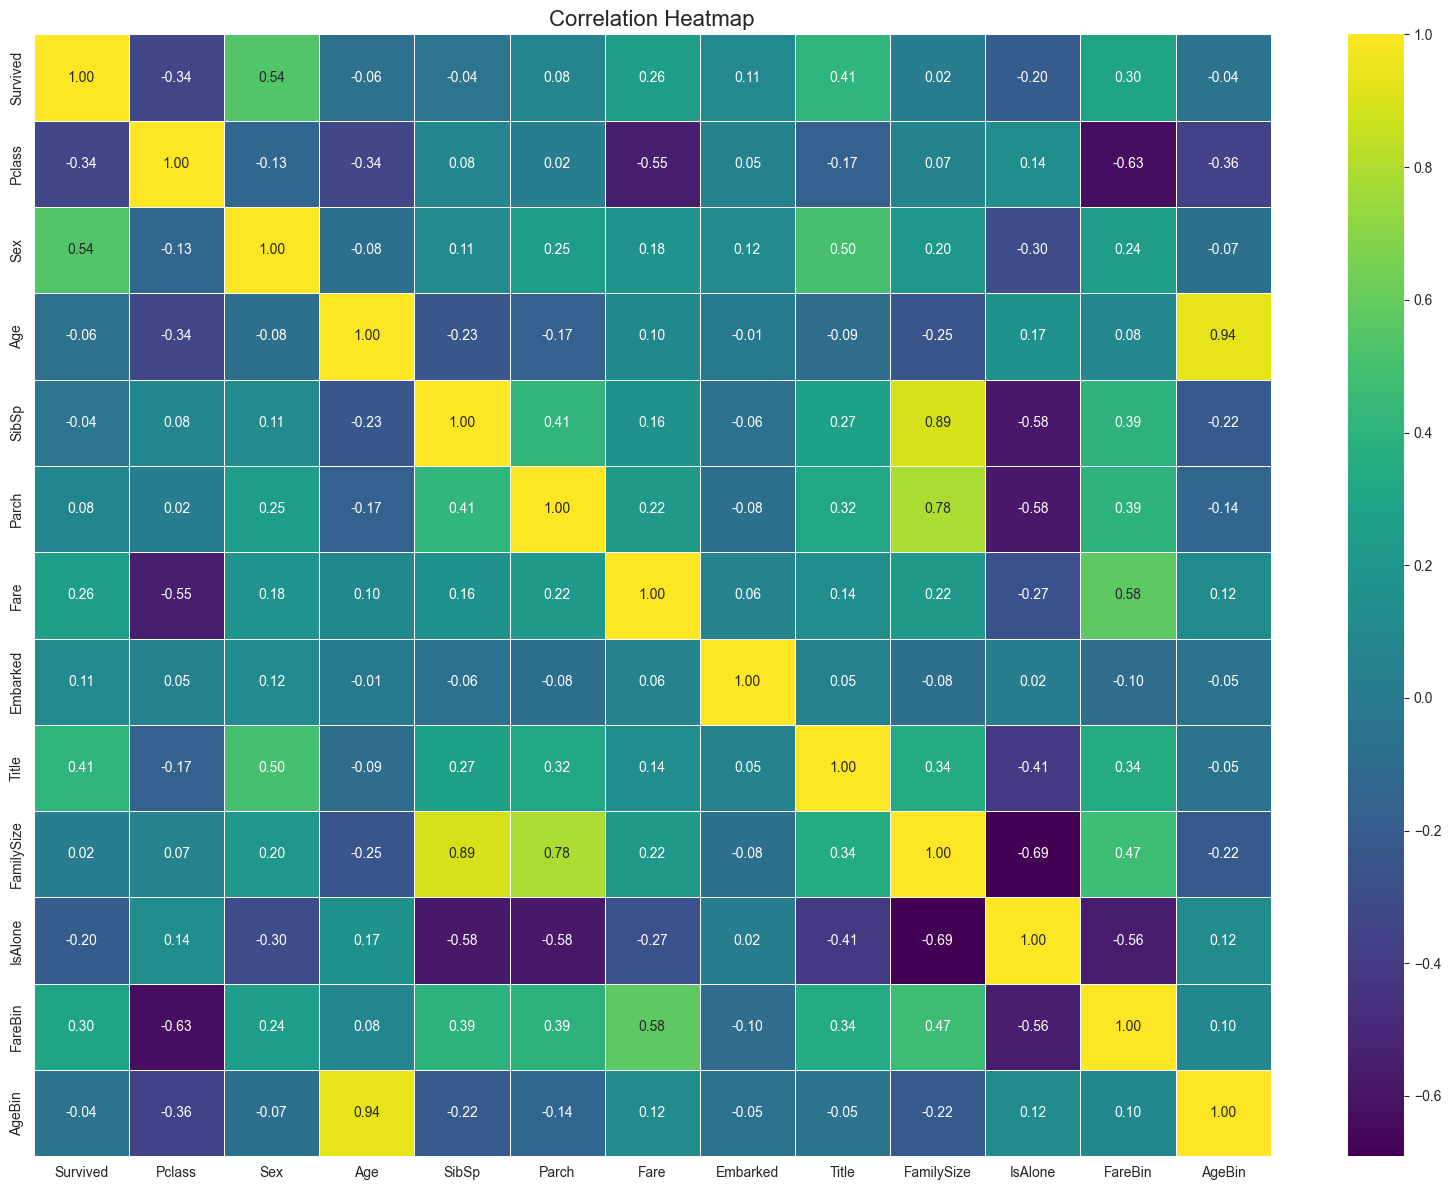

In [22]:
# Display correlation heatmap at full width
plt.figure(figsize=(16, 12))  # Create a new large figure
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

## 6. Feature Engineering

In [23]:
# We've already done some feature engineering above
# Let's create interaction terms
df['Age*Class'] = df['Age'] * df['Pclass']
df['Fare*Pclass'] = df['Fare'] * df['Pclass']

# Create polynomial features
df['Age^2'] = df['Age'] ** 2
df['Fare^2'] = df['Fare'] ** 2

# Drop SibSp and Parch as we've created FamilySize
df = df.drop(['SibSp', 'Parch'], axis=1)

In [24]:
print("\nFinal dataset shape after feature engineering:", df.shape)
print("\nColumns after feature engineering:")
print(df.columns.tolist())


Final dataset shape after feature engineering: (891, 15)

Columns after feature engineering:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'FareBin', 'AgeBin', 'Age*Class', 'Fare*Pclass', 'Age^2', 'Fare^2']


## 7. Machine Learning Classification

In [25]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (623, 14)
Testing set shape: (268, 14)


In [26]:
# Define different classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

In [27]:
# Train and cross-validate each model
results = {}
for name, classifier in classifiers.items():
    # Train model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'model': classifier,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression:
Accuracy: 0.8134
Cross-validation mean accuracy: 0.8137 (+/- 0.0140)
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       165
           1       0.77      0.74      0.75       103

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Decision Tree:
Accuracy: 0.7948
Cross-validation mean accuracy: 0.7890 (+/- 0.0292)
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       165
           1       0.74      0.72      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268


Random Forest:
Accuracy: 0.8134
Cross-validation mean accuracy: 0.8238 (+/- 0.0223)
Classification Report:
              pr

## 8. Model Evaluation and Comparison

In [28]:
# Compare model results
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'CV Mean Accuracy': [results[model]['cv_mean'] for model in results],
    'CV Std Dev': [results[model]['cv_std'] for model in results]
})

print("\nModel Comparison:")
print(model_comparison.sort_values('CV Mean Accuracy', ascending=False))


Model Comparison:
                 Model  Accuracy  CV Mean Accuracy  CV Std Dev
3    Gradient Boosting  0.805970          0.835026    0.015624
2        Random Forest  0.813433          0.823796    0.022333
0  Logistic Regression  0.813433          0.813690    0.013966
1        Decision Tree  0.794776          0.789009    0.029152
4                  SVM  0.645522          0.660015    0.038943


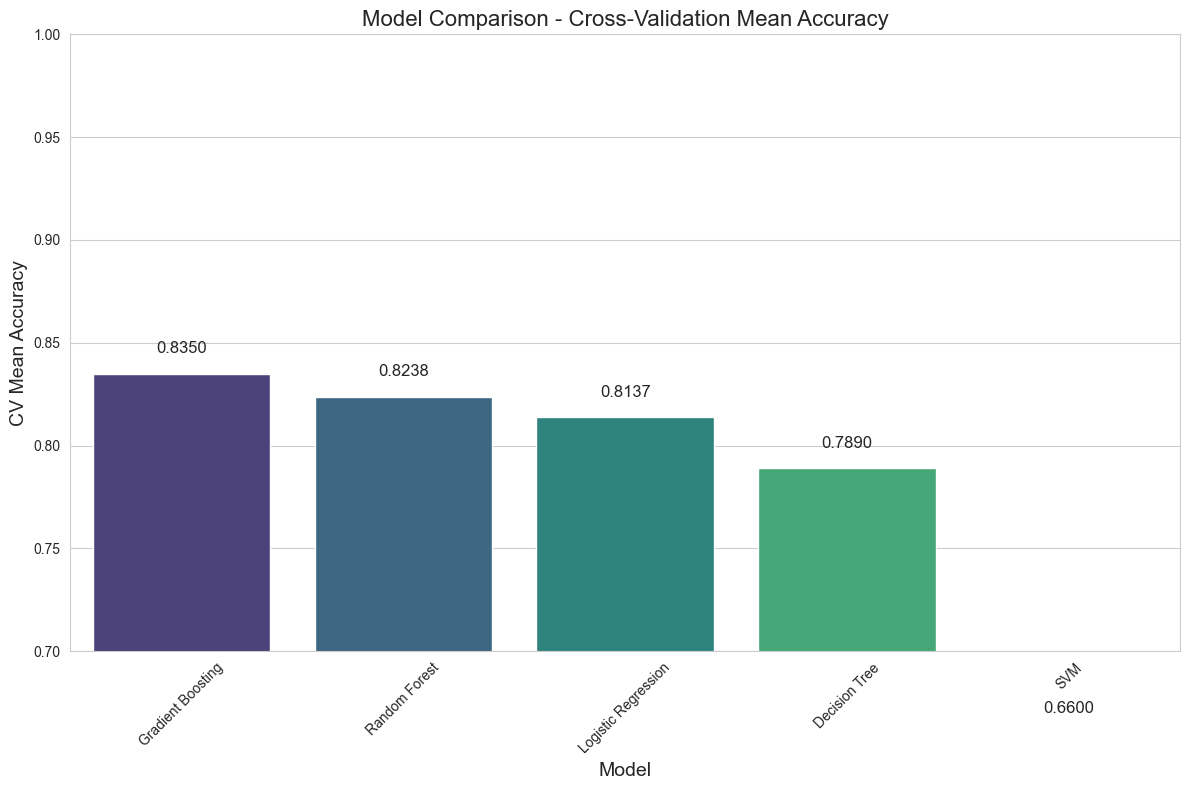

In [29]:
# Visualize model comparison
plt.figure(figsize=(12, 8))
model_comparison = model_comparison.sort_values('CV Mean Accuracy', ascending=False)
sns.barplot(x='Model', y='CV Mean Accuracy', data=model_comparison, palette='viridis')
plt.title('Model Comparison - Cross-Validation Mean Accuracy', fontsize=16)
plt.ylabel('CV Mean Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
for i, v in enumerate(model_comparison['CV Mean Accuracy']):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
# Find the best model
best_model_name = model_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with CV accuracy: {model_comparison.iloc[0]['CV Mean Accuracy']:.4f}")


Best model: Gradient Boosting with CV accuracy: 0.8350


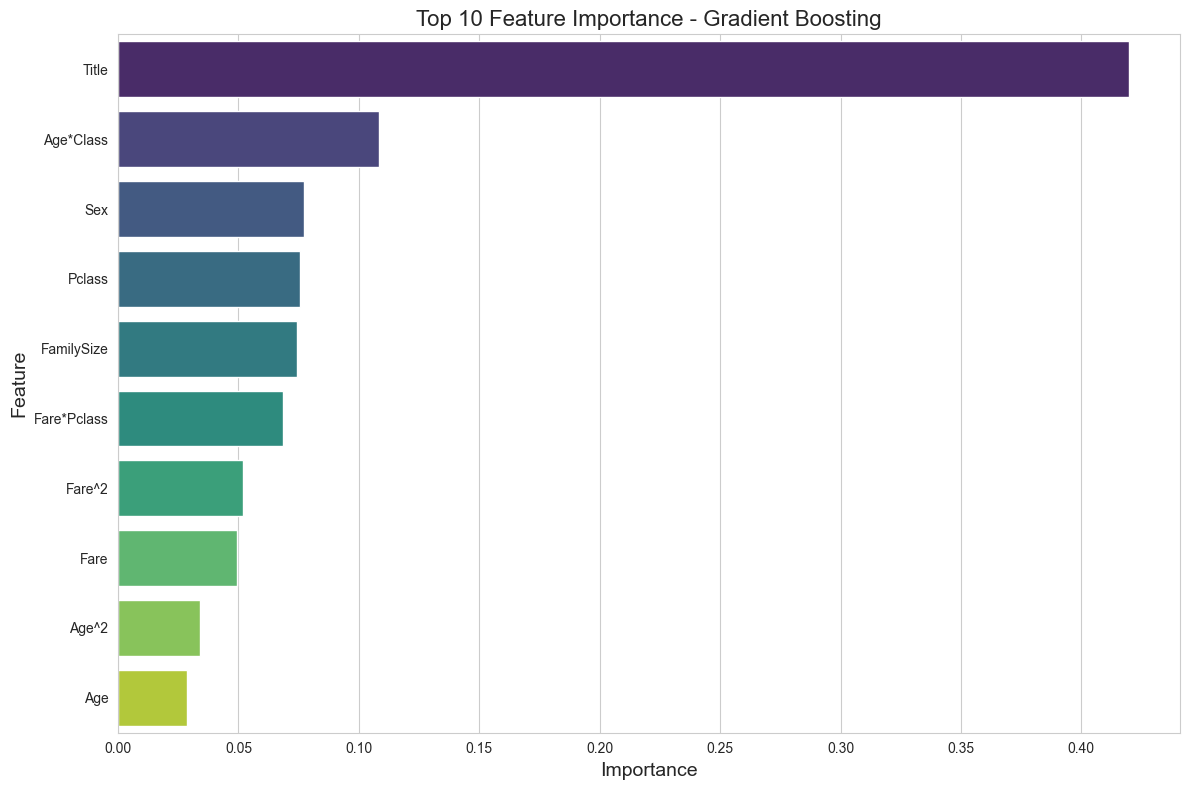


Top 10 Important Features:
        Feature  Importance
5         Title    0.419967
10    Age*Class    0.108538
1           Sex    0.077390
0        Pclass    0.075466
6    FamilySize    0.074395
11  Fare*Pclass    0.068556
13       Fare^2    0.052099
3          Fare    0.049589
12        Age^2    0.033877
2           Age    0.028523


In [31]:
# Feature importance for the best model (if applicable)
if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))

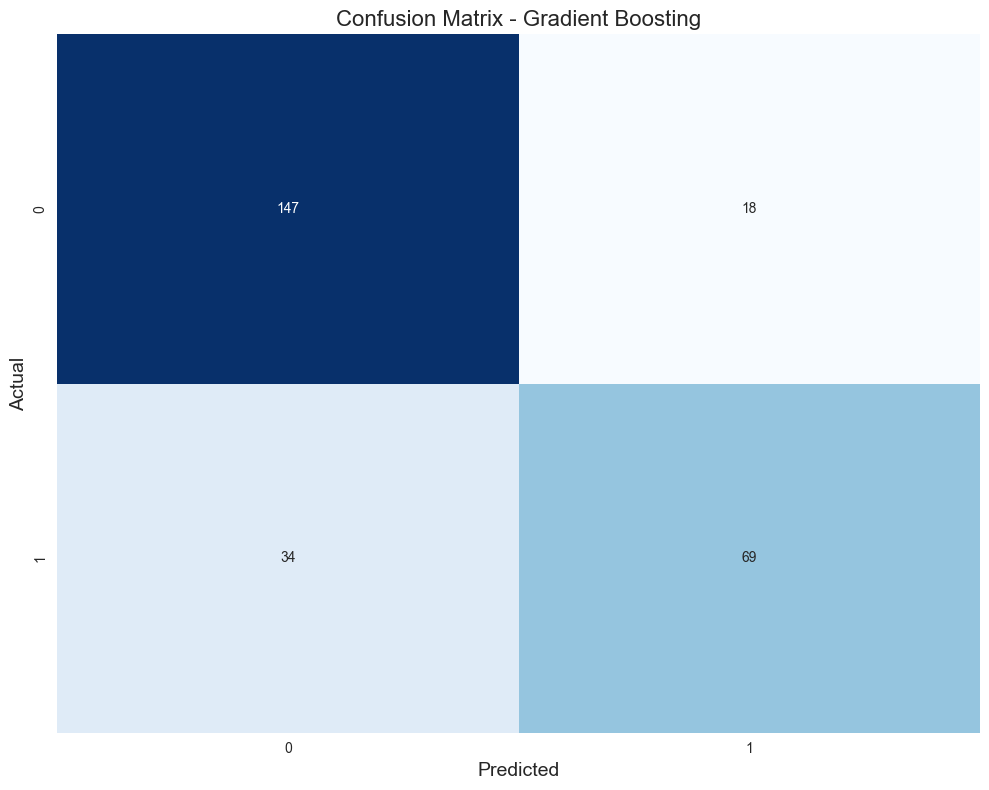

In [32]:
# Confusion Matrix of the best model
best_y_pred = results[best_model_name]['y_pred']
conf_matrix = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.tight_layout()
plt.show()

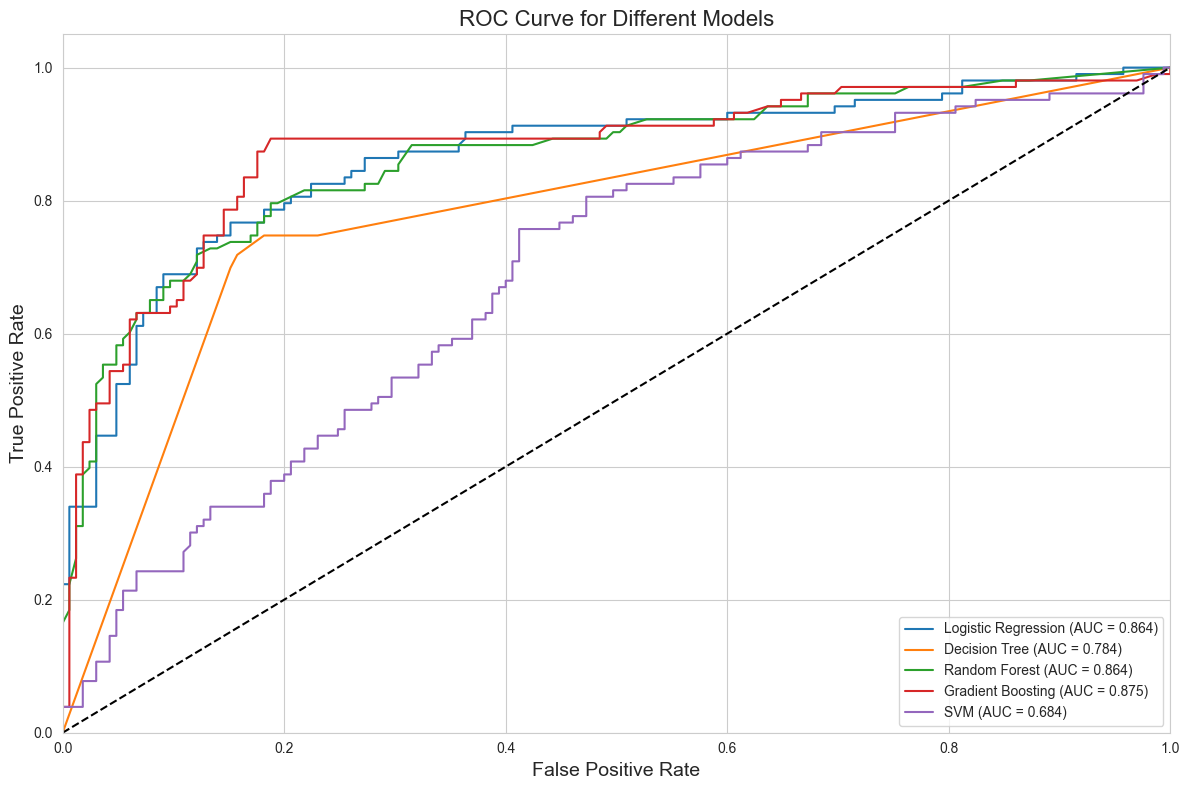

In [33]:
# ROC Curve and AUC for all models
plt.figure(figsize=(12, 8))
for name, result in results.items():
    model = result['model']
    # Get probability predictions
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Different Models', fontsize=16)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [34]:
# Hyperparameter tuning for the best model
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1', 'l2']
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear']
    }


Performing hyperparameter tuning for Gradient Boosting...


In [35]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8330


In [36]:
# Final model with best parameters
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"\nFinal Model ({best_model_name} with best parameters):")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Classification Report:")
print(classification_report(y_test, final_predictions))


Final Model (Gradient Boosting with best parameters):
Accuracy: 0.8134
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       165
           1       0.84      0.64      0.73       103

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.81       268



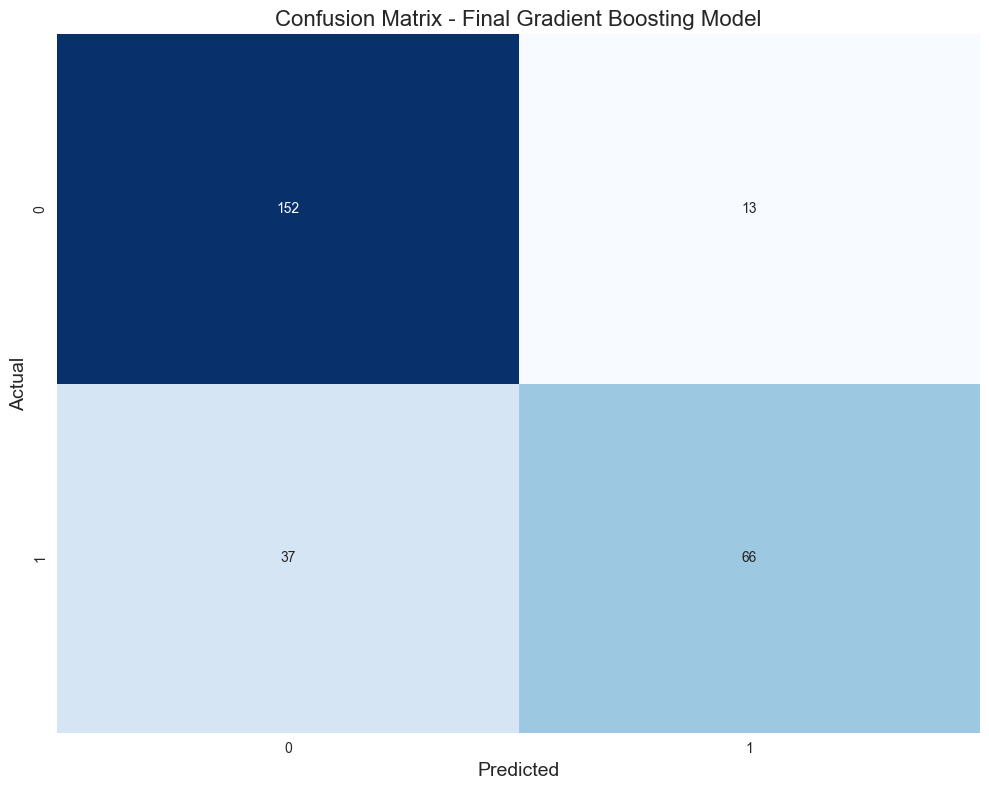

In [37]:
# Final Confusion Matrix
final_conf_matrix = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Final {best_model_name} Model', fontsize=16)
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.tight_layout()
plt.show()

In [38]:
# Conclusions
print("\n===== Conclusions =====")
print(f"1. The best model is {best_model_name} with an accuracy of {final_accuracy:.4f}")
print("2. Key factors that influenced survival:")
if 'feature_importance' in locals():
    for i, row in feature_importance.head(5).iterrows():
        print(f"   - {row['Feature']}: {row['Importance']:.4f}")
else:
    print("   - Sex (being female increased survival chances)")
    print("   - Class (higher class increased survival chances)")
    print("   - Age (children had higher survival rates)")
    print("   - Family size (moderate family size increased survival)")

print("\n3. Model Performance Summary:")
print(f"   - Training accuracy: {grid_search.best_score_:.4f}")
print(f"   - Test accuracy: {final_accuracy:.4f}")

print("\n4. Next Steps:")
print("   - Try ensemble methods combining multiple models")
print("   - Explore more advanced feature engineering")
print("   - Consider more complex models like neural networks")
print("   - Collect more data if possible to improve model performance")


===== Conclusions =====
1. The best model is Gradient Boosting with an accuracy of 0.8134
2. Key factors that influenced survival:
   - Title: 0.4200
   - Age*Class: 0.1085
   - Sex: 0.0774
   - Pclass: 0.0755
   - FamilySize: 0.0744

3. Model Performance Summary:
   - Training accuracy: 0.8330
   - Test accuracy: 0.8134

4. Next Steps:
   - Try ensemble methods combining multiple models
   - Explore more advanced feature engineering
   - Consider more complex models like neural networks
   - Collect more data if possible to improve model performance
